# Maze exercise

In [8]:
import heapq
#extr maze from file and identify the start and final positions.
def parse_maze(file_path):
    maze = []
    start = goal = None
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            row = list(line.strip())
            maze.append(row)
            if 'S' in row:
                start = (i, row.index('S'))
            if 'G' in row:
                goal = (i, row.index('G'))
    return maze, start, goal

def dijkstra(maze, start, goal, verbose=False):#priority queue for exploring paths with minimum cost
    rows, cols = len(maze), len(maze[0])
    pq = [(0, start, [])]  # (total cost, current position, path)
    visited = set()
    moves_explored=0

    #directions to move in corresponding labels
    directions = {
        (0, 1): "Right",
        (1, 0): "Down",
        (0, -1): "Left",
        (-1, 0): "Up"
    }

    while pq:
        cost, (x, y), path = heapq.heappop(pq)
        moves_explored+=1
        #if reached goal, return path and cost
        if (x, y) == goal:
            #research steps(moves)
            moves = []
            for (prev_x, prev_y), (cur_x, cur_y) in zip(path, path[1:] + [(x, y)]):
                dx, dy = cur_x - prev_x, cur_y - prev_y
                moves.append(directions[(dx, dy)])



            return path + [(x, y)], moves, cost + (int(maze[x][y]) if maze[x][y].isdigit() else 0), moves_explored

        if (x, y) in visited:
            continue
        visited.add((x, y))

        #explore neighbors
        for (dx, dy), move in directions.items():
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and (nx, ny) not in visited:
                if maze[nx][ny] == 'X':
                    continue  #if wall
                #calculate cost
                new_cost = cost + (int(maze[nx][ny]) if maze[nx][ny].isdigit() else 0)
                heapq.heappush(pq, (new_cost, (nx, ny), path + [(x, y)]))

    return None, None, float('inf'), moves_explored  #if no path

def solve_maze(file_path):
    """Solve the maze by finding the shortest path from S to G and printing the results."""
    maze, start, goal = parse_maze(file_path)
    print("Maze:")
    for row in maze:
        print(row)
    print()
    # start
    print(f"Start: {start}")
    # goal
    print(f"Goal: {goal}")
    path, moves, total_cost,moves_explored = dijkstra(maze, start, goal)

    if path:
        path_str = " -> ".join(f"({x},{y})" for x, y in path)
        moves_str = " -> ".join(moves)
        print(f"Path: {path_str}")
        print(f"Moves: {moves_str}")
        print(f"Total Cost: {total_cost}")
        print(f"Moves Explored {moves_explored}")
    else:
        print("No path found from start to goal.")
#letsgo
solve_maze("maze_20x20.txt")

Maze:
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'S', '1', '1', '1', '0', '8', '4', '2', '2', '1', 'X', 'X', '0', '6', 'X', '5', '0', '1', 'X']
['X', '6', '5', '4', '1', '3', '8', '0', '5', '9', '7', '0', '3', '9', '5', '0', '0', '2', '1', 'X']
['X', '7', '0', '1', '4', '4', '4', '8', '4', '3', '8', '0', '7', 'X', '4', '9', '7', '0', '7', 'X']
['X', '8', '3', '3', '5', '1', '0', '3', 'X', '1', '1', '7', '9', '7', '1', '6', '1', 'X', '1', 'X']
['X', '7', '7', '0', '8', 'X', '0', '0', '7', '0', '6', '7', '8', '3', '0', '5', 'X', '8', '0', 'X']
['X', 'X', '3', '0', '0', '9', '4', '3', '4', '0', '9', '0', 'X', '5', '5', '8', '8', 'X', '1', 'X']
['X', '1', '2', '5', '4', '0', 'X', '0', '4', '6', '2', '9', '0', '0', '3', '8', '9', '0', '2', 'X']
['X', '5', '3', '1', '7', '7', '3', '6', '4', '8', '4', '0', '6', '6', '6', '0', '8', '0', '6', 'X']
['X', 'X', '5', '4', '5', '2', '6', '0', '8', '3', '5', '3', '2', '9', '3', '3', '7',

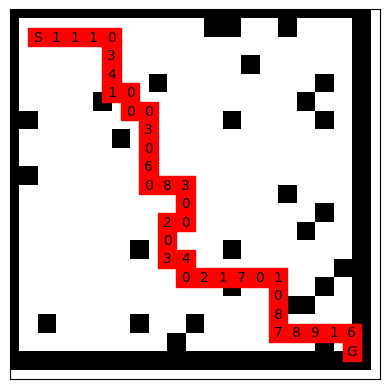

In [3]:
# let's print the maze and color the path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

def plot_maze(maze, path):
    rows, cols = len(maze), len(maze[0])
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_yaxis()
    cmap = LinearSegmentedColormap.from_list("cmap", ["black", "white"])
    ax.imshow([[0 if cell == "X" else 1 for cell in row] for row in maze], cmap=cmap)
    # show actual cost of path
    for i, (x, y) in enumerate(path):
        cost = maze[x][y]
        ax.text(y + 0.5, x + 0.5, cost, ha="center", va="center")
    for x, y in path:
        ax.add_patch(patches.Rectangle((y, x), 1, 1, color="red"))
    plt.show()

maze, start, goal = parse_maze("maze_20x20.txt")
path, _, _ = dijkstra(maze, start, goal)
plot_maze(maze, path)

In [6]:
# how long is the path?
print(f"Path is {len(path)} steps long")

Path is 37 steps long


In [13]:
solve_maze("maze6x6.txt")

Maze:
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
['X', 'S', '1', '1', '9', '1', '1', 'X']
['X', '8', 'X', '9', '9', 'X', '1', 'X']
['X', '0', '0', 'X', '9', 'X', '1', 'X']
['X', '1', '2', '3', 'G', '1', '1', 'X']
['X', 'X', '0', '1', '1', 'X', 'X', 'X']
['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']

Start: (1, 1)
Goal: (4, 4)
Path: (1,1) -> (2,1) -> (3,1) -> (3,2) -> (4,2) -> (5,2) -> (5,3) -> (5,4) -> (4,4)
Moves: Down -> Down -> Right -> Down -> Down -> Right -> Right -> Up
Total Cost: 12
Moves Explored 16


## Alternative approaches

*   We could try flooding from Source to Goal - this would find us A solution
*   We could do a full breadth first search
* We could try bi-direction approach meaning we search from Start and Goal at the same time and then when we meet we have the optimal (just need to look for edge cases)
* We could even use Bellman Ford for this



In [14]:
# let's create a solution that uses Bellman Ford to solve it.
# Again we have source represented by S
# we have G - goal,but with Bellman Ford we will find shortest path costs for ALL vertices
# again the graph is represented by costs of getting to each cell in a text format
# example graph representation
# XXXXXXXX
# XS11911X
# X8X99X1X
# X00X9X1X
# X123G11X
# XX011XXX
# XXXXXXXX
# X represents impassable wall
# we are allowed to move only vertically and horizontally

# let's call this functions solve_with_bellman_ford and it takes maze file name as parameter
# it returns matrix of costs for all cells (X will have value of infinity) and also the specific cost of G as a separate return value

import sys

def solve_with_bellman_ford(file_path):
    maze, start, goal = parse_maze(file_path)
    rows, cols = len(maze), len(maze[0])
    # Initialize distances with infinity, except for the start
    distances = [[sys.float_info.max for _ in range(cols)] for _ in range(rows)]
    start_row, start_col = start
    distances[start_row][start_col] = 0

    # Get list of all valid moves (edges)
    edges = []
    for r in range(rows):
        for c in range(cols):
            if maze[r][c] != 'X':
                current_cost = int(maze[r][c]) if maze[r][c].isdigit() else 0
                for dr, dc in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] != 'X':
                        next_cost = int(maze[nr][nc]) if maze[nr][nc].isdigit() else 0
                        edges.append(((r, c), (nr, nc), next_cost))

    # Relax edges repeatedly
    for _ in range(rows * cols - 1):
        for (u_r, u_c), (v_r, v_c), weight in edges:
            if distances[u_r][u_c] != sys.float_info.max and distances[u_r][u_c] + weight < distances[v_r][v_c]:
                distances[v_r][v_c] = distances[u_r][u_c] + weight

    # Check for negative cycles (not expected in this maze problem with non-negative weights)
    for (u_r, u_c), (v_r, v_c), weight in edges:
        if distances[u_r][u_c] != sys.float_info.max and distances[u_r][u_c] + weight < distances[v_r][v_c]:
            print("Maze contains a negative cycle")
            return None, None # Should not happen with non-negative weights

    goal_row, goal_col = goal
    return distances, distances[goal_row][goal_col]

# Example usage:
# costs_matrix, goal_cost = solve_with_bellman_ford("maze_20x20.txt")
# if costs_matrix:
#     print("Costs Matrix:")
#     for row in costs_matrix:
#         print([round(x, 2) if x != sys.float_info.max else 'inf' for x in row])
#     print(f"\nCost to reach Goal: {goal_cost}")

costs_matrix_6x6, goal_cost_6x6 = solve_with_bellman_ford("maze6x6.txt")
if costs_matrix_6x6:
    print("\nCosts Matrix (6x6):")
    for row in costs_matrix_6x6:
        print([round(x, 2) if x != sys.float_info.max else 'inf' for x in row])
    print(f"\nCost to reach Goal (6x6): {goal_cost_6x6}")


Costs Matrix (6x6):
['inf', 'inf', 'inf', 'inf', 'inf', 'inf', 'inf', 'inf']
['inf', 0, 1, 2, 11, 12, 13, 'inf']
['inf', 8, 'inf', 11, 20, 'inf', 14, 'inf']
['inf', 8, 8, 'inf', 21, 'inf', 15, 'inf']
['inf', 9, 10, 13, 12, 13, 14, 'inf']
['inf', 'inf', 10, 11, 12, 'inf', 'inf', 'inf']
['inf', 'inf', 'inf', 'inf', 'inf', 'inf', 'inf', 'inf']

Cost to reach Goal (6x6): 12
